In [2]:
import random as rd
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import shutil
import os

In [78]:
#Gifts generation
n_gifts = 3
max_tries = 200
verbose = True
#Roulette
total_frames = 45
power = 1.2
start_slow_0 = 33

In [69]:
def initialization():
    family_dict = {
    "Maman":  {"is_Bretonniere": True,  "couple" : [""],      "gifts_to": [], "gifts_received":0},
    "PA":     {"is_Bretonniere": True,  "couple" : ["Lidia"], "gifts_to": [], "gifts_received":0}, 
    "Lidia":  {"is_Bretonniere": False, "couple" : ["PA"],    "gifts_to": [], "gifts_received":0},
    "Claire": {"is_Bretonniere": True,  "couple" : ["Adrien"],"gifts_to": [], "gifts_received":0},
    "Adrien": {"is_Bretonniere": False, "couple" : ["Claire"],"gifts_to": [], "gifts_received":0},
    "Arnaud": {"is_Bretonniere": True,  "couple" : ["AL"],    "gifts_to": [], "gifts_received":0},
    "AL":     {"is_Bretonniere": False, "couple" : ["Arnaud"],"gifts_to": [], "gifts_received":0},
    "Hubert": {"is_Bretonniere": False, "couple" : [""],      "gifts_to": [], "gifts_received":0}
    }
    return family_dict

In [70]:
family_dict=initialization()
n_people = len(family_dict)
max_combinations = math.comb(n_people-1,n_gifts)
people = list(family_dict.keys())

In [71]:
def check_bretonniere(test):
    has_bretonniere = any(family_dict[test[i]]['is_Bretonniere'] for i in range(len(test)))
    return has_bretonniere

In [72]:
#test = rd.sample(list(family_dict.keys()),k=n_gifts)

#print(test)
#print(type(test))
#person="AL"
#test=["AL","Adrien","Lidia"]
def validation(test, person):
    valid_list=True
#    check_bretonniere = has_bretonniere(test)
    if family_dict[person]["couple"][0] in test:
        if verbose:
            print("couple")
        valid_list=False
    has_bretonniere=check_bretonniere(test)
    if not has_bretonniere:
        if verbose:
            print("no Bretonniere")
        valid_list = False
    for gifted in test:
            if family_dict[gifted]["gifts_received"] >= 3:
                valid_list = False
#                print("Problem: already", family_dict[gifted]["gifts_received"], "gifts for ", gifted )
        
#optimized:
    #valid_list = not any(family_dict[gifted]["gifts_received"] >= 3 for gifted in test)
    return valid_list

#validation(test,person)

In [73]:
def display_gifts(family_dict):
    for p in list(family_dict.keys()):
        print(p,"offers to",family_dict[p]["gifts_to"], family_dict[k]["gifts_received"],"gifts received")               

In [74]:
for j in range(1,max_tries+1):
    print("try ",j)
    family_dict=initialization()
    for i in range(0,n_people):
        person=list(family_dict.keys())[i]
        print("Generating presents for ",person,"( try #",j,")",i)
        valid_list = False
        max=1
        tested_list=[]
        while not valid_list and max <= math.comb(n_people-1,n_gifts):
            reduced_list = [ name  for name in list(family_dict.keys()) if name != person]
            list_test = sorted(rd.sample(reduced_list,k=n_gifts))
            if not list_test in tested_list:
                tested_list.append(list_test)
                if verbose:
                    print("Testing",list_test, "(",max,"/",max_combinations,")")
                valid_list = validation(list_test,person)
                max+=1
            if max == max_combinations:
                if verbose:
                    print("all combinations tested")
                    if family_dict[gifted]["gifts_received"] != 3:
                        valid_list = False
                break 
            
        if valid_list:
            family_dict[person]["gifts_to"]=list_test
            for gifted in list(family_dict[person]["gifts_to"]):
                family_dict[gifted]["gifts_received"]+=1
                print("adding 1 present to",gifted,". Now has ",family_dict[gifted]["gifts_received"],"presents.")
            if verbose:
                for k in list(family_dict.keys()):
                    print(k)
                    print(family_dict[k]["gifts_to"],family_dict[k]["gifts_received"])
            print("----")
            if i==n_people-1:
                print("Found! (after ",j,"tries)")
                j=max_tries
                break
    
        else:
            print("No valid list found after ",j,"tries")
            display_gifts(family_dict)
            break
            
    if valid_list and i==n_people -1 :
        break
display_gifts(family_dict)     

try  1
Generating presents for  Maman ( try # 1 ) 0
Testing ['Hubert', 'Lidia', 'PA'] ( 1 / 35 )
adding 1 present to Hubert . Now has  1 presents.
adding 1 present to Lidia . Now has  1 presents.
adding 1 present to PA . Now has  1 presents.
Maman
['Hubert', 'Lidia', 'PA'] 0
PA
[] 1
Lidia
[] 1
Claire
[] 0
Adrien
[] 0
Arnaud
[] 0
AL
[] 0
Hubert
[] 1
----
Generating presents for  PA ( try # 1 ) 1
Testing ['AL', 'Arnaud', 'Lidia'] ( 1 / 35 )
couple
Testing ['Adrien', 'Claire', 'Hubert'] ( 2 / 35 )
adding 1 present to Adrien . Now has  1 presents.
adding 1 present to Claire . Now has  1 presents.
adding 1 present to Hubert . Now has  2 presents.
Maman
['Hubert', 'Lidia', 'PA'] 0
PA
['Adrien', 'Claire', 'Hubert'] 1
Lidia
[] 1
Claire
[] 1
Adrien
[] 1
Arnaud
[] 0
AL
[] 0
Hubert
[] 2
----
Generating presents for  Lidia ( try # 1 ) 2
Testing ['Arnaud', 'Hubert', 'Maman'] ( 1 / 35 )
adding 1 present to Arnaud . Now has  1 presents.
adding 1 present to Hubert . Now has  3 presents.
adding 1 prese

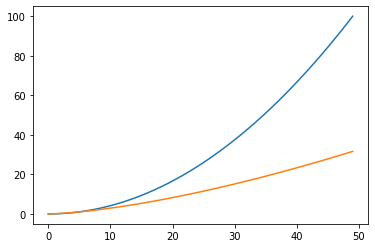

In [75]:
x = np.linspace(0, 10)
plt.plot(x**2)
plt.plot(x**(1.5))


In [76]:
#instead of the generate_random_sequence that generates numbers (with no 2 consecutive ones), we generate a list of names
def generate_random_names_sequence(n,people):
    rd.shuffle(people)
    random_names_sequence = []

    for i in range(n):
    # Ensure that consecutive elements are not the same
        while True:
            name = rd.choice(people)
            if not random_names_sequence or random_names_sequence[-1] != name:
                random_names_sequence.append(name)
                break
    return random_names_sequence

generate_random_names_sequence(5,people)

['Maman', 'Arnaud', 'Adrien', 'Hubert', 'PA']

In [77]:
nb=1
gifter="PA"
index_gifter = people.index(gifter)
print("index_gifter:",index_gifter)
print("-")
print(family_dict[gifter]["gifts_to"])
print("--")
#print(family_dict[list(family_dict.keys())[nb]])
print("---")
#print(family_dict[list(family_dict.keys())[nb]]["gifts_to"][0])
rdms = generate_random_names_sequence(10,people)
for i,nb in enumerate(rdms):
    print(i,nb)

index_gifter: 2
-
['AL', 'Claire', 'Hubert']
--
---
0 Maman
1 Arnaud
2 Lidia
3 AL
4 Lidia
5 Maman
6 Lidia
7 Hubert
8 Maman
9 Lidia


In [87]:
def create_image_list(gifter,family_dict,total_frames):


    list_imgs_0 = []
    list_imgs_1 = []
    list_imgs_2 = []
    people = list(family_dict.keys())
    rdms = generate_random_names_sequence(total_frames,people)
    for i, nb in enumerate(rdms):
        if i < start_slow_0:
            list_imgs_0.append(nb+".png")
        if ((i > start_slow_0) & (i < total_frames)):
            for j in range(int((i-start_slow_0)**(power))):
 #               list_imgs_0.append(nb)
                list_imgs_0.append("pics/"+family_dict[gifter]["gifts_to"][0]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_0
 


    start_slow_1 = int(3*len(list_imgs_0) / 4)
# 
# change last roulette0 here

    rdms1 = generate_random_names_sequence(start_slow_1,people)
    rdms2 = generate_random_names_sequence(start_slow_1,people)

    for i, nb in enumerate(rdms1):
        list_imgs_1.append("pics/"+nb+".png")
        list_imgs_2.append("pics/"+rdms2[i]+".png")
        list_imgs_0.append(list_imgs_0[-1])
                


    rdms = generate_random_names_sequence(total_frames,people)

    for i, nb in enumerate(rdms):
        if i < slow_start:
            list_imgs_1.append("pics/"+family_dict[gifter]["gifts_to"][1]+".png")

        if ((i > slow_start) & (i < total_frames)):
            for j in range(int((i-slow_start)**(power))):
#                list_imgs_1.append(nb%8)
                list_imgs_1.append("pics/"+family_dict[gifter]["gifts_to"][1]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_1
 
    start_slow_2 = int(1*len(list_imgs_1) / 2)

# change last roulette1 here

    rdms = generate_random_names_sequence(start_slow_2,people)

    for i, nb in enumerate(rdms):
        list_imgs_2.append(nb+".png") #error here? want to put last image of 3rd image
#        list_imgs_2.append(nb%8)
        list_imgs_1.append(list_imgs_1[-1])
        list_imgs_0.append(list_imgs_0[-1])

    rdms = generate_random_names_sequence(start_slow_2,people)

    for i, nb in enumerate(rdms):
        if i < slow_start:
            list_imgs_2.append("pics/"+family_dict[gifter]["gifts_to"][2]+".png")

        if ((i > slow_start) & (i < total_frames)):
            for j in range(int((i-slow_start)**(power))):
#                list_imgs_2.append(nb%8) 
                list_imgs_2.append("pics/"+family_dict[gifter]["gifts_to"][2]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_2
                

    total_frames = len(list_imgs_2)
    return list_imgs_0, list_imgs_1, list_imgs_2
    
# change last roulette1 here

In [88]:
total_frames

45

In [98]:
print(family_dict[gifter]["gifts_to"])

['AL', 'Claire', 'Hubert']


In [99]:
create_image_list(gifter,family_dict, total_frames)

(['Lidia.png',
  'Claire.png',
  'Arnaud.png',
  'PA.png',
  'Maman.png',
  'AL.png',
  'Maman.png',
  'Hubert.png',
  'Maman.png',
  'Lidia.png',
  'Hubert.png',
  'Maman.png',
  'Hubert.png',
  'AL.png',
  'Claire.png',
  'PA.png',
  'Lidia.png',
  'Arnaud.png',
  'Claire.png',
  'Hubert.png',
  'Lidia.png',
  'Maman.png',
  'Hubert.png',
  'Arnaud.png',
  'PA.png',
  'Adrien.png',
  'PA.png',
  'Arnaud.png',
  'Hubert.png',
  'AL.png',
  'Maman.png',
  'AL.png',
  'Lidia.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',
  'AL.png',

In [100]:
for i in range(n_people):
    person=people[i]
    print(person)
    list_imgs_0, list_imgs_1, list_imgs_2 = create_image_list(person,family_dict,total_frames)

Adrien
Maman
PA
Hubert
Arnaud
Lidia
AL
Claire


In [102]:
print(list_imgs_0)
print(list_imgs_1)
print(list_imgs_2)

['Claire.png', 'Arnaud.png', 'AL.png', 'Maman.png', 'Adrien.png', 'PA.png', 'Arnaud.png', 'Maman.png', 'Arnaud.png', 'AL.png', 'Maman.png', 'Hubert.png', 'Claire.png', 'PA.png', 'Lidia.png', 'PA.png', 'Adrien.png', 'Lidia.png', 'Arnaud.png', 'Claire.png', 'Maman.png', 'Lidia.png', 'AL.png', 'Maman.png', 'AL.png', 'Lidia.png', 'Hubert.png', 'Arnaud.png', 'AL.png', 'Adrien.png', 'Arnaud.png', 'Maman.png', 'Lidia.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 'AL.png', 

In [109]:
def create_video(gifter,family_dict,total_frames):

    list_imgs_0, list_imgs_1, list_imgs_2 = create_image_list(gifter,family_dict,total_frames)
    fig, ax = plt.subplots(1, 3, figsize=(17, 5))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    fig.patch.set_facecolor([150/255, 40/255, 28/255])
    def init_video():
        ax[0].clear()
        return []
    
    def update_video(frame):
#     print(frame+1%8)
        ax[0].clear()
    # Your plotting code here
        ax[0].imshow(Image.open(list_imgs_0[frame]))
    
        ax[1].clear()
    # Your plotting code here
        ax[1].imshow(Image.open(list_imgs_1[frame]))
    
        ax[2].clear()
    # Your plotting code here
        ax[2].imshow(Image.open(list_imgs_2[frame]))
        for i in range(3):
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    ani = FuncAnimation(fig, update_video, frames=total_frames, init_func=init_video, repeat=False, interval=50)
    ani.save(gifter+'/roulette.mp4')#, dpi=5)

gifts to: ['AL', 'Claire', 'Hubert']


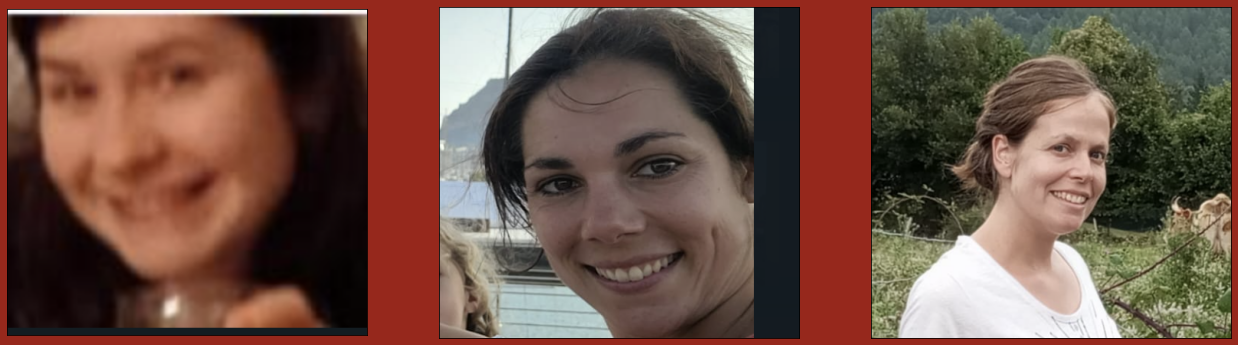

In [167]:
gifter="PA"
print("gifts to:",family_dict[gifter]["gifts_to"])
create_video(gifter,family_dict,total_frames)
#wrong display: is it because it doesn't show the last image of the video or because the last image of the video is wrong (then see previous comments)


In [168]:
print(family_dict)
gifter="PA"
gifted=family_dict[gifter]["gifts_to"]
print("gifted",gifted)

gifters_0 = [person for person, details in family_dict.items() if gifted[0] in details["gifts_to"]]
print(gifters_0)

other_gifters = [giver for giver in gifters_0 if giver != gifter ]    
print(other_gifters)

{'Maman': {'is_Bretonniere': True, 'couple': [''], 'gifts_to': ['Adrien', 'Arnaud', 'Hubert'], 'gifts_received': 3}, 'PA': {'is_Bretonniere': True, 'couple': ['Lidia'], 'gifts_to': ['AL', 'Claire', 'Hubert'], 'gifts_received': 3}, 'Lidia': {'is_Bretonniere': False, 'couple': ['PA'], 'gifts_to': ['AL', 'Arnaud', 'Hubert'], 'gifts_received': 3}, 'Claire': {'is_Bretonniere': True, 'couple': ['Adrien'], 'gifts_to': ['AL', 'Maman', 'PA'], 'gifts_received': 3}, 'Adrien': {'is_Bretonniere': False, 'couple': ['Claire'], 'gifts_to': ['Arnaud', 'Maman', 'PA'], 'gifts_received': 3}, 'Arnaud': {'is_Bretonniere': True, 'couple': ['AL'], 'gifts_to': ['Lidia', 'Maman', 'PA'], 'gifts_received': 3}, 'AL': {'is_Bretonniere': False, 'couple': ['Arnaud'], 'gifts_to': ['Adrien', 'Claire', 'Lidia'], 'gifts_received': 3}, 'Hubert': {'is_Bretonniere': False, 'couple': [''], 'gifts_to': ['Adrien', 'Claire', 'Lidia'], 'gifts_received': 3}}
gifted ['AL', 'Claire', 'Hubert']
['PA', 'Lidia', 'Claire']
['Lidia', 'C

In [169]:
def copy_files(gifter,family_dict):
    gifted=family_dict[gifter]["gifts_to"]
    print("gifted",gifted)
    for i in range(3):
        print("gifted",i,gifted[i])
        shutil.copy("pics/"+gifted[i]+".png",os.path.join(gifter,"gifted"+str(i)+".png"))
        lutins = [person for person, details in family_dict.items() if gifted[i] in details["gifts_to"]]
        other_lutins = [giver for giver in lutins if giver != gifter ]
        print("lutins",lutins)
        print("other_lutins",other_lutins)
        for j in range(2):
            shutil.copy(os.path.join("pics","lutins",other_lutins[j]+".png"),os.path.join(gifter,"lutins/lutin"+str(i)+str(j)+".png"))

In [170]:
for gifter in people:       
    copy_files(gifter,family_dict)
#Won't work until we have all the lutins/*png

gifted ['Arnaud', 'Maman', 'PA']
gifted 0 Arnaud
lutins ['Maman', 'Lidia', 'Adrien']
other_lutins ['Maman', 'Lidia']


FileNotFoundError: [Errno 2] No such file or directory: 'lutins/Maman.png'